In [131]:
import numpy as np
import pyamg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

from scipy.sparse.linalg import eigsh
import scipy
%matplotlib inline


In [90]:
results_df = pd.read_csv('Poisson_Eigen_b.csv')
results_df['error'] = np.abs(results_df['norm(x-y)'] - results_df['sigma']/results_df['lambda'])
del results_df['Unnamed: 0']

In [78]:
method = 'MG'
side = 'small'

results_method_side = results_df[(results_df['side']==side) & (results_df['Method']==method)].copy()
results_method_side['error'] = np.abs(results_method_side['norm(x-y)'] - results_method_side['sigma']/results_method_side['lambda'])

In [87]:
methods = [('SD',1),('CG',2),('GMRES',3),('MG',4)]
target = ['norm(y-x-eps)']
features = ['N','sigma','lambda']

side = 'small'

for name, index in methods:
    method_results = results_df[(results_df['Method']==name) & (results_df['side']==side)]
    X = method_results.loc[:,features]
    Y = np.abs(method_results['norm(x-y)'] - method_results['sigma']/method_results['lambda'])
    
    reg = LinearRegression(normalize=True).fit(np.log(X), np.log(Y))
    print("{} & {} & {} & {} & {} & {}\\\\".format(name, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.intercept_, reg.score(np.log(X), np.log(Y)),))

SD & -8.189862196396462 & 0.7577976934213478 & -8.812846529952372 & 17.359085808167475 & 0.8674651313876172\\
CG & 2.6075566992266306 & 0.37667934250165785 & 1.073063714439422 & -41.069360468791736 & 0.5848087414452882\\
GMRES & 1.618744165164947 & 0.3336121777707589 & -0.6565512337624705 & -35.92924172492428 & 0.6917560333858657\\
MG & 0.2549495971949177 & 0.46502287436708384 & -1.3641966777234067 & -29.45138354798488 & 0.798411811166807\\


In [73]:
results_mean = results_method_side.groupby(by=['N','k','sigma']).mean().reset_index()

In [119]:
method = 'MG'
side = 'small'
N = 10000
sigma = 1e-4

results_spec = results_df[(results_df['Method']==method) & (results_df['side'] == side) & (results_df['N'] == N) & (results_df['sigma'] == sigma)]

SD & 4.4346e-04 & 1.5016e-02 & -3.5376e-03 & 1.2555e-01\\
CG & -1.7428e-11 & 8.7255e-10 & 1.3924e-10 & 1.1100e-02\\
GMRES & 4.3797e-11 & -8.1161e-09 & -3.4133e-10 & 2.7117e-02\\
MG & 1.3952e-14 & 3.8464e-13 & -1.0725e-13 & 4.5421e-03\\


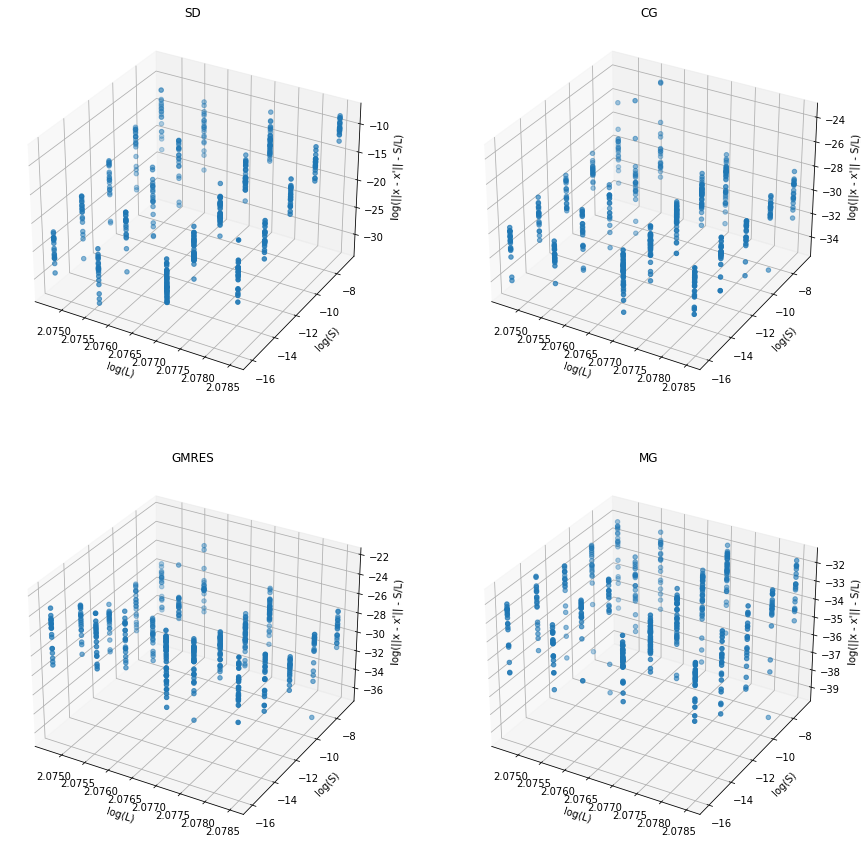

In [164]:
side = 'large'
N = 50**2

methods = [('SD',1),('CG',2),('GMRES',3),('MG',4)]
target = ['error']
features = ['lambda','sigma']

fig = plt.figure(figsize=(15,15))
for name, index in methods:
    method_results = results_df[(results_df['Method']==name) & (results_df['side'] == side) & (results_df['N']==N)]

    X = np.log(method_results.loc[:,features])
    Y = np.log(method_results.loc[:,target])
    
    ax = fig.add_subplot(2, 2, index, projection='3d')
    ax.set_title(name)
    ax.set_xlabel('log(L)')
    ax.set_ylabel('log(S)')
    ax.set_zlabel('log(||x - x\'|| - S/L)')
    ax.scatter3D(X['lambda'], X['sigma'], Y, 'gray')
    
    X = method_results.loc[:,features]
    Y = method_results.loc[:,target]
    reg = LinearRegression(normalize=True).fit(X, Y)
    print("{} & {:.4e} & {:.4e} & {:.4e} & {:.4e}\\\\".format(name, reg.coef_[0,0], reg.coef_[0,1], reg.intercept_[0], reg.score(X, Y),))

plt.show()